In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("AirQualityUCI.csv")

In [19]:
print(df.info())      
print(df.describe())   
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

In [20]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])


In [21]:
df = df.dropna(subset=['Date', 'Time'])  
df = df.fillna(df.mean(numeric_only=True)) 

In [22]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df = df.drop(columns=['Date', 'Time'])  # Remove old columns


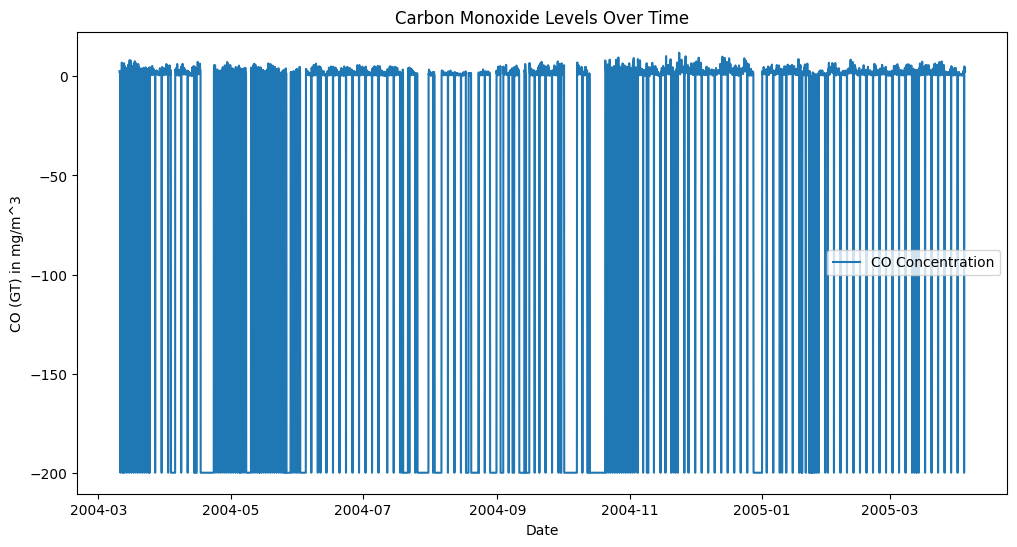

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df['Datetime'], df['CO(GT)'], label='CO Concentration')
plt.xlabel('Date')
plt.ylabel('CO (GT) in mg/m^3')
plt.title('Carbon Monoxide Levels Over Time')
plt.legend()
plt.show()


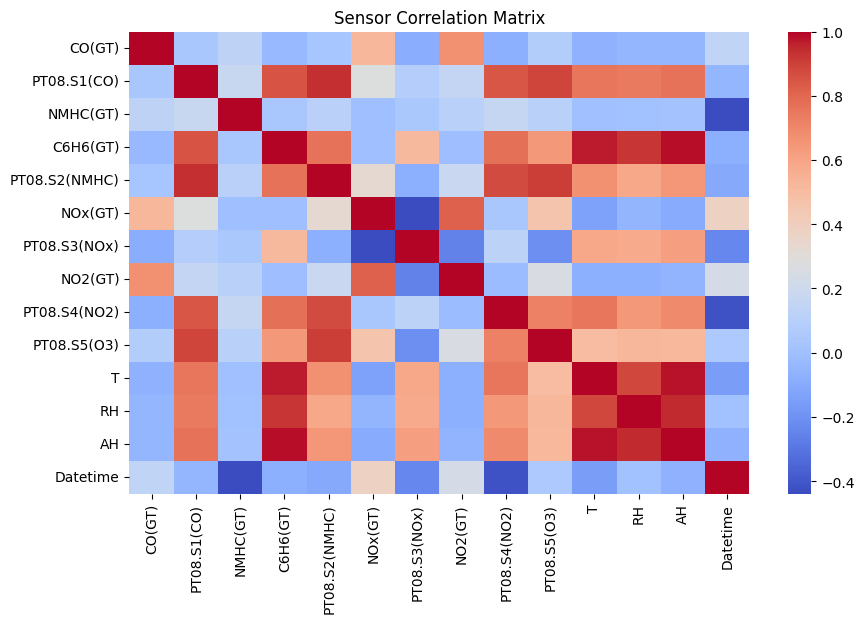

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Sensor Correlation Matrix")
plt.show()
